In [ ]:
#OBSERVATIONS

# 1) Most of the users of the ride application are in urban areas.
# 2) About 78% of the application drivers drive in urban areas.
# 3) About 62% of total revenue from ride fares comes from urban areas.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [67]:
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"


ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [68]:
city_data_df = pd.read_csv(city_data)
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [69]:
ride_groupby = ride_data_df.groupby('city')
ride_percity = ride_groupby.count()['fare']
avg_percity = ride_groupby.mean()['fare']
fare_percity = ride_groupby.sum()['fare']


In [70]:
city_data_df.set_index('city', inplace=True)
city_data_df['avg fare'] = avg_percity
city_data_df['ride count'] = ride_percity
city_data_df['total fare'] = fare_percity
city_data_df.head()

,driver_count,type,avg fare,ride count,total fare
city,,,,,
Kelseyland,63,Urban,21.806429,28,610.58
Nguyenbury,8,Urban,25.899615,26,673.39
East Douglas,12,Urban,26.169091,22,575.72
West Dawnfurt,34,Urban,22.330345,29,647.58
Rodriguezburgh,52,Urban,21.332609,23,490.65


In [71]:
urban_df = city_data_df.loc[city_data_df['type']=='Urban',:]
suburb_df = city_data_df.loc[city_data_df['type']=='Suburban',:]
rural_df = city_data_df.loc[city_data_df['type']=='Rural',:]
rural_df.head()

,driver_count,type,avg fare,ride count,total fare
city,,,,,
South Elizabethmouth,3,Rural,28.698000,5,143.49
East Troybury,3,Rural,33.244286,7,232.71
Kinghaven,3,Rural,34.980000,6,209.88
New Johnbury,6,Rural,35.042500,4,140.17
Erikport,3,Rural,30.043750,8,240.35


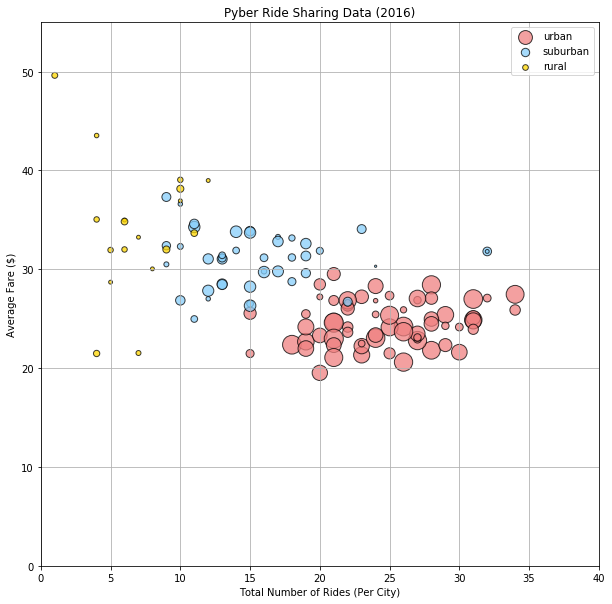

In [77]:
# Bubble Plot

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)

ax1.scatter(urban_df['ride count'], urban_df['avg fare'], s=5*urban_df['driver_count'], c='lightcoral', marker='o',edgecolors="black", label='urban', alpha=0.75)
ax1.scatter(suburb_df['ride count'], suburb_df['avg fare'], s=5*suburb_df['driver_count'], c='lightskyblue', marker="o",edgecolors="black", label='suburban', alpha=0.75)
ax1.scatter(rural_df['ride count'], rural_df['avg fare'], s=5*rural_df['driver_count'], c='Gold', marker="o",edgecolors="black", label='rural',alpha=0.75)

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylim(0, 55)
plt.xlim(0, 40)
plt.legend(loc='upper right')
plt.grid()

plt.savefig('pyber.png')
plt.show()




In [78]:
# % of Total Fares by City Type
total_fares_by_citytype = city_data_df.groupby('type')['total fare'].sum()
total_fares_by_citytype_df = pd.DataFrame(total_fares_by_citytype)

fare_total = total_fares_by_citytype_df.sum()

percent_of_total_fares_by_type = total_fares_by_citytype_df/fare_total * 100
percent_of_total_fares_by_type.head()

,total fare
type,
Rural,6.579786
Suburban,31.445750
Urban,61.974463


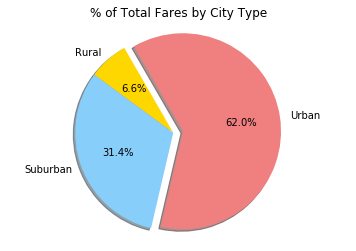

In [79]:
# % of Total Fares by City Type - Pie Chart

labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [6.579786, 31.445750, 61.974463]

# The colors of each section of the pie chart
colors = ["Gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)

plt.axis("equal")
plt.title('% of Total Fares by City Type')

plt.show()

In [80]:
# % of Total Rides by City Type
total_rides_by_citytype = city_data_df.groupby('type')['ride count'].sum()
total_rides_by_citytype_df = pd.DataFrame(total_rides_by_citytype)

ride_total = total_rides_by_citytype_df.sum()

percent_of_total_rides_by_type = total_rides_by_citytype_df/ride_total * 100
percent_of_total_rides_by_type.head()

,ride count
type,
Rural,5.193187
Suburban,27.295388
Urban,67.511425


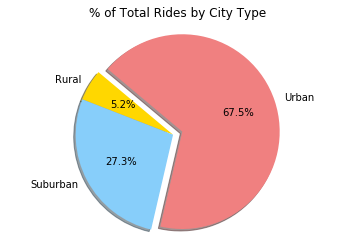

In [81]:
# % of Total Rides by City Type - Pie Chart

labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [5.193187, 27.295388, 67.511425]

# The colors of each section of the pie chart
colors = ["Gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

plt.show()

In [84]:
# % of Total Drivers by City Type
total_drivers = city_data_df.groupby('type')['driver_count'].sum()
total_drivers_df = pd.DataFrame(total_drivers)

total_drivers_by_type = total_drivers_df / total_drivers_df.sum() * 100
total_drivers_by_type.head()


,driver_count
type,
Rural,3.105405
Suburban,19.050463
Urban,77.844133


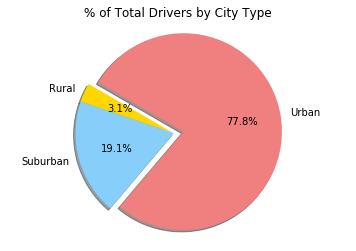

In [87]:
# % of Total Drivers by City Type - Pie Chart

labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [3.105405, 19.050463, 77.844133]

# The colors of each section of the pie chart
colors = ["Gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.axis("equal")
plt.title('% of Total Drivers by City Type')

plt.show()
